Model for motor 6:
   Accuracy  Precision    Recall  F1 score
0  0.502566   0.000000  0.000000  0.000000
1  0.924072   0.000000  0.000000  0.000000
2  0.247698   0.060367  0.991987  0.113808
3  0.906780   0.000000  0.000000  0.000000
4  0.724505   0.000000  0.000000  0.000000
5  0.743363   0.400000  0.005764  0.011364
6  0.265601   0.263921  1.000000  0.417622


Mean performance metric and standard error:
Accuracy: 0.6164 +- 0.2825
Precision: 0.1035 +- 0.1625
Recall: 0.2854 +- 0.4854
F1 score: 0.0775 +- 0.1557


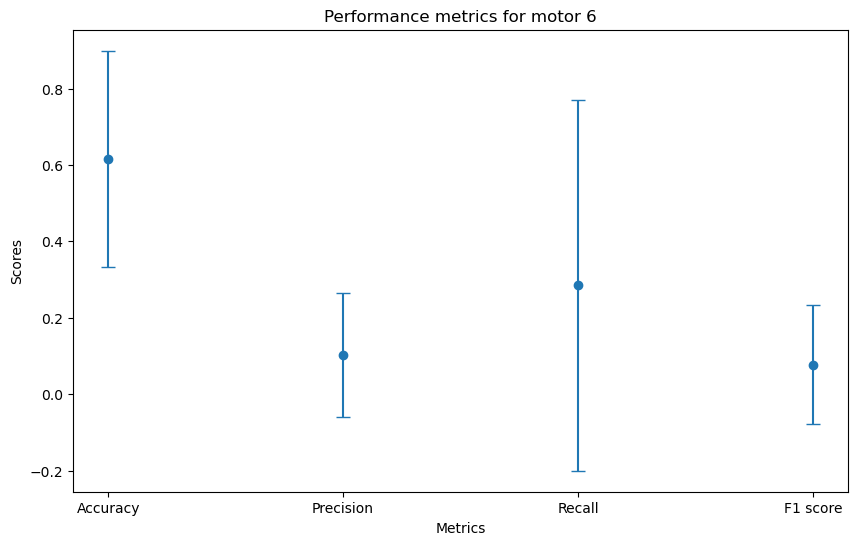

,Accuracy,Precision,Recall,F1 score
0,0.502566,0.000000,0.000000,0.000000
1,0.924072,0.000000,0.000000,0.000000
2,0.247698,0.060367,0.991987,0.113808
3,0.906780,0.000000,0.000000,0.000000
4,0.724505,0.000000,0.000000,0.000000
5,0.743363,0.400000,0.005764,0.011364
6,0.265601,0.263921,1.000000,0.417622


In [1]:
from utility import read_all_test_data_from_path
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import numpy as np
%matplotlib inline

# 数据预处理函数
def remove_outliers(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges.
    Define a valid range of temperature and voltage.
    Use ffill function to replace the invalid measurement with the previous value.
    '''
    df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
    df['temperature'] = df['temperature'].ffill()

    df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
    df['voltage'] = df['voltage'].ffill()

    df['position'] = df['position'].where(df['position'] >= 0, np.nan)
    df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
    df['position'] = df['position'].ffill()

# 忽略警告
warnings.filterwarnings('ignore')

# 读取和预处理数据
base_dictionary = '../../dataset/training_data/'
df_data = read_all_test_data_from_path(base_dictionary, remove_outliers, is_plot=False)

# 指定要包含在测试中的测试条件
df_data_experiment = df_data[df_data['test_condition'].isin(['20240425_093699', '20240425_094425', '20240426_140055',
                                                             '20240503_164675', '20240503_165189',
                                                             '20240503_163963', '20240325_155003'])]

# 定义特征列表
feature_list_all = ['time', 'data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                    'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                    'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                    'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                    'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                    'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']

# 移除用于训练和预测的'test_condition'列
X = df_data_experiment[feature_list_all]
y_true = df_data_experiment['data_motor_6_label']

# 定义管道步骤
steps = [
    ('standardizer', StandardScaler()),  # Step 1: 标准化
    ('mdl', IsolationForest())  # Step 2: Isolation Forest
]

# 创建管道
pipeline = Pipeline(steps)

# 定义要搜索的超参数
param_grid = {
    'mdl__n_estimators': [50, 100, 200],  # Number of base estimators in the ensemble
    'mdl__max_samples': ['auto', 0.5, 0.75],  # Number of samples to draw from X to train each base estimator
    'mdl__contamination': [0.01, 0.05, 0.1],  # Contamination factor
    'mdl__max_features': [1.0, 0.5, 0.75]  # Number of features to draw from X to train each base estimator
}

# 初始化GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=5)

# 拟合模型
grid_search.fit(X, y_true)

# 最佳参数
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# 预测
y_pred = grid_search.predict(X)

# 将Isolation Forest输出转换为二进制标签
y_pred = np.where(y_pred == 1, 0, 1)

# 计算评估指标
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [1]:
from utility import read_all_test_data_from_path
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import numpy as np
from imblearn.over_sampling import SMOTE
%matplotlib inline

# 数据预处理函数
def remove_outliers(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges.
    Define a valid range of temperature and voltage.
    Use ffill function to replace the invalid measurement with the previous value.
    '''
    df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
    df['temperature'] = df['temperature'].ffill()

    df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
    df['voltage'] = df['voltage'].ffill()

    df['position'] = df['position'].where(df['position'] >= 0, np.nan)
    df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
    df['position'] = df['position'].ffill()

# 忽略警告
warnings.filterwarnings('ignore')

# 读取和预处理数据
base_dictionary = '../../dataset/training_data/'
df_data = read_all_test_data_from_path(base_dictionary, remove_outliers, is_plot=False)

# 指定要包含在测试中的测试条件
df_data_experiment = df_data[df_data['test_condition'].isin(['20240425_093699', '20240425_094425', '20240426_140055',
                                                             '20240503_164675', '20240503_165189',
                                                             '20240503_163963', '20240325_155003'])]

# 定义特征列表
feature_list_all = ['time', 'data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                    'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                    'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                    'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                    'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                    'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']

# 移除用于训练和预测的'test_condition'列
X = df_data_experiment[feature_list_all]
y_true = df_data_experiment['data_motor_6_label']

# 使用SMOTE进行过采样处理
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y_true)

# 定义管道步骤
steps = [
    ('standardizer', StandardScaler()),  # Step 1: 标准化
    ('mdl', IsolationForest())  # Step 2: Isolation Forest
]

# 创建管道
pipeline = Pipeline(steps)

# 定义要搜索的超参数
param_grid = {
    'mdl__n_estimators': [50, 100, 200, 500],  # Number of base estimators in the ensemble
    'mdl__max_samples': ['auto', 0.5, 0.75, 1.0],  # Number of samples to draw from X to train each base estimator
    'mdl__contamination': [0.01, 0.05, 0.1, 0.2],  # Contamination factor
    'mdl__max_features': [1.0, 0.5, 0.75]  # Number of features to draw from X to train each base estimator
}

# 初始化GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=7)

# 拟合模型
grid_search.fit(X_resampled, y_resampled)

# 最佳参数
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# 预测
y_pred = grid_search.predict(X)

# 将Isolation Forest输出转换为二进制标签
y_pred = np.where(y_pred == 1, 0, 1)

# 计算评估指标
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Best parameters found:  {'mdl__contamination': 0.01, 'mdl__max_features': 1.0, 'mdl__max_samples': 'auto', 'mdl__n_estimators': 50}
Best cross-validation score:  nan
Accuracy: 0.8080
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
